<a href="https://colab.research.google.com/github/IshanKapadia-Data/Instacart-Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

aisles       = pd.read_csv('aisles.csv')
departments  = pd.read_csv('departments.csv')
products     = pd.read_csv('products.csv')
orders       = pd.read_csv('orders.csv')
prior        = pd.read_csv('order_products__prior.csv')
train        = pd.read_csv('order_products__train.csv')

In [ ]:
order_products = prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(32434489, 15)

In [ ]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
order_products.user_id.nunique()

206209

In [ ]:
cross_df = pd.crosstab(order_products.user_id, order_products.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [ ]:
df.shape

(206209, 134)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088341,-0.104549,-0.116443,0.083694,-0.062523,-0.026177
1,-0.036988,0.108884,-0.066406,-0.123271,0.098849,-0.033960,-0.054736,-0.053366,-0.020370,-0.008092
2,0.064282,0.103962,0.000710,-0.012221,-0.046984,0.112238,-0.029812,0.007860,0.012277,0.001852
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356,-0.019278,-0.025115,-0.038234,0.006492,-0.000623
4,0.094629,-0.037051,-0.024952,-0.021575,0.055369,0.107649,-0.008034,0.103931,0.051732,-0.025799


In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

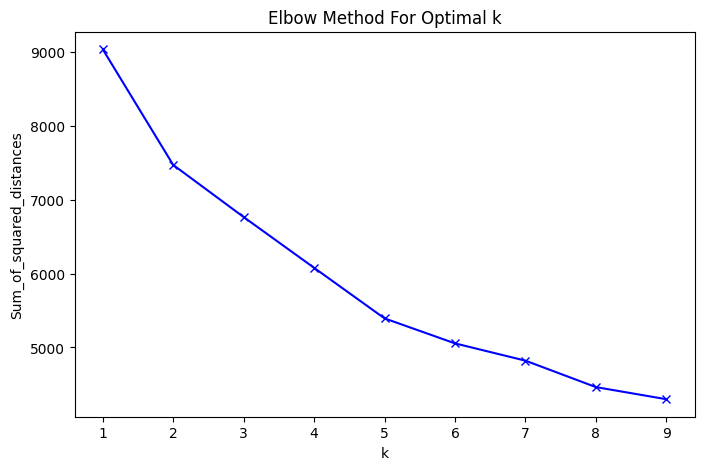

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=6,random_state=31).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[-1.22061712e-02  1.22235061e-01  4.02172513e-03  2.32794359e-01
   1.12890649e-01 -2.19402572e-02  7.70048665e-04 -5.82153862e-03
   7.67760901e-03  3.28610392e-03]
 [ 1.06556250e-02  2.01964828e-02 -1.65594938e-02 -2.74152802e-02
   1.38273118e-02  1.31765426e-02 -1.30714606e-03  3.14460683e-03
  -2.68951028e-03  1.03687053e-05]
 [-9.85382776e-02 -1.81481798e-02 -2.67000194e-02  3.74054502e-03
  -2.14465939e-02 -4.07128279e-03  1.41066880e-03 -3.88213501e-03
   1.09942132e-03 -6.47016786e-04]
 [ 1.21393662e-01  1.95243277e-01  1.53973212e-02 -2.57421466e-02
  -3.41562299e-02 -6.04827918e-03 -6.97028094e-04  9.37779210e-04
   1.34584122e-03 -1.50968118e-03]
 [ 1.22467065e-01 -8.23598692e-02  2.32585880e-02  7.33285971e-03
  -7.50009380e-04 -8.71707315e-03 -7.18918048e-04  6.38092828e-04
   6.30687014e-04  1.31035119e-03]
 [-2.01069132e-01  1.70013031e-02  3.28979825e-01 -3.28944980e-02
   2.10918418e-02  2.09985477e-03  5.78324289e-03  1.01488412e-02
   1.00242412e-03 -4.25739637e-03

In [ ]:
temp_df = df_pca.iloc[:, 0:2].copy()
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

,pc1,pc2,cluster
0,-0.113443,0.039084,2
1,-0.036988,0.108884,1
2,0.064282,0.103962,1
3,-0.093210,0.054093,2
4,0.094629,-0.037051,1


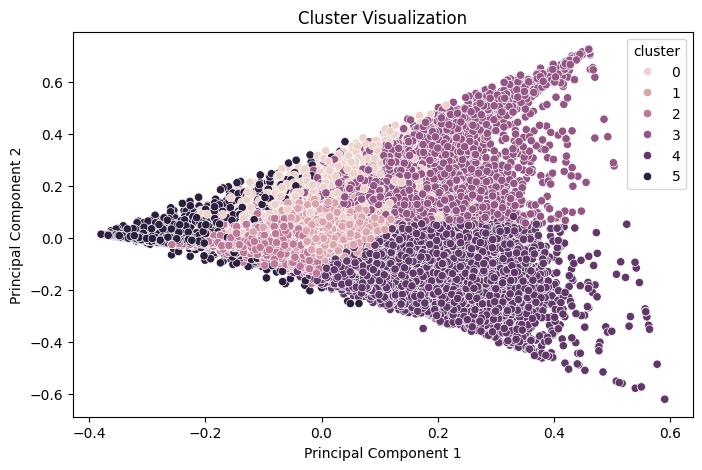

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [ ]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [ ]:
cluster1.shape

(7687, 135)

In [ ]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

,0
aisle,
packaged produce,18.408222
fresh fruits,10.229478
packaged vegetables fruits,4.214128
fresh vegetables,3.164564
water seltzer sparkling water,1.767009
milk,1.657344
packaged cheese,1.585014
chips pretzels,1.156498
frozen produce,1.137375


In [ ]:
cluster2.shape

(68432, 135)

In [ ]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

,0
aisle,
fresh fruits,26.279738
fresh vegetables,18.475801
yogurt,13.084420
packaged vegetables fruits,12.865341
packaged cheese,6.924684
milk,6.466624
water seltzer sparkling water,4.431509
soy lactosefree,4.417553
chips pretzels,4.350888


In [ ]:
cluster3.shape

(67487, 135)

In [ ]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

,0
aisle,
fresh fruits,5.227955
fresh vegetables,4.354365
chips pretzels,4.278083
packaged cheese,3.932965
yogurt,3.885726
water seltzer sparkling water,3.864818
packaged vegetables fruits,3.595463
milk,3.329693
soft drinks,3.280513


In [ ]:
cluster4.shape

(12865, 135)

In [ ]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

,0
aisle,
fresh fruits,34.570229
fresh vegetables,8.720093
packaged vegetables fruits,7.725845
yogurt,4.434512
milk,3.707812
soy lactosefree,2.458375
water seltzer sparkling water,2.339914
packaged cheese,2.280373
packaged produce,2.009716


In [ ]:
cluster5.shape

(44677, 135)

In [ ]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

,0
aisle,
fresh vegetables,38.469772
fresh fruits,21.283524
packaged vegetables fruits,11.288493
yogurt,4.937888
packaged cheese,4.359782
fresh herbs,4.295253
milk,3.507733
soy lactosefree,3.448284
frozen produce,3.070349


# 🧩 Customer Segmentation Results

### ⭐ Cluster 1
* **Consumers:** 7,687
* **Top Aisles:** Packaged Produce, Fresh Fruits, Packaged Vegetables & Fruits
* **Insight:** Convenience-focused shoppers with strong interest in fresh produce that’s easy to prepare


### ⭐ Cluster 2
* **Consumers:** 68,432
* **Top Aisles:** Fresh Fruits, Fresh Vegetables, Yogurt
* **Insight:** Balanced shoppers prioritizing whole foods and fresh dairy — likely health-aware


### ⭐ Cluster 3
* **Consumers:** 67,487
* **Top Aisles:** Fresh Fruits, Chips & Pretzels, Packaged Cheese, Soft Drinks
* **Insight:** Mixed-basket consumers combining fresh items with snacks and indulgent products


### ⭐ Cluster 4
* **Consumers:** 12,865
* **Top Aisles:** Fresh Fruits, Fresh Vegetables, Packaged Vegetables & Fruits
* **Insight:** Fruit-heavy segment possibly daily shoppers or health-focused individuals


### ⭐ Cluster 5
* **Consumers:** 44,677
* **Top Aisles:** Fresh Vegetables, Fresh Fruits, Fresh Herbs, Soy/Lactose-Free
* **Insight:** Heavy plant-based basket likely vegetarian or clean-eating users with consistent buying patterns

